In [1]:
# Cleaned up version of MCMC model-fitting script
import numpy as np
import pymultinest as pmn
import matplotlib as mpl

import os
import corner
import sys

from astropy.cosmology import w0waCDM, Flatw0waCDM
from exoticDE_fit.genclass_cosm import Cosmology

In [31]:
# Define cosmological parameters
Omega_m, Omega_merror = 0.3, 1.0

h0, w0, d_w0 = 70., 0.9, 0.1
ode0, wa = (1-Omega_m),(1.-w0)

# For use with the Cosmology class import
model_name, params = 'slowroll', [Omega_m, d_w0, h0]

In [116]:
# add_ztf = True when using wfirst + ztf
add_ztf = True

# Instantiate for high-z-only-JLA + ZTF
# add_ztf_jla = False 

# Using Cosmology class, Set n_params to 4, if Astropy, set to 5
parameters = 4

In [117]:
# for plotting in corner, Describe the fit i.e. 'JLA + ZTF fit to Slowroll'
model_fit_name = 'Fit to slowroll'

# Name a directory using the current model to be run with this script, i.e. 'JLA + ZTF'
current_model = 'WFIRST + ZTF No prior'

# In order to calculate the delta log evidence as in the Jeffery's scale, 
#   define an existing chain directory for a previously run model
comparison_model = 'JLA No Prior' 

In [118]:
# Creates the directory name and path for current model
chains_directory = '/Users/markpoe/ZTF/lowzSN/notebooks/chains/' # General chains directory 
chain_dir = (chains_directory + current_model + '/') # Specific chain directory
chain_dir2 = (chains_directory + comparison_model + '/')
print (chain_dir)
print (chain_dir2)

# Create the necessary directory to store chains
if not os.path.exists(chain_dir):
    os.makedirs(chain_dir)
    
# Directory in which to save plots
plot_save = './Plots/Final Report Plots/'

/Users/markpoe/ZTF/lowzSN/notebooks/chains/WFIRST + ZTF No prior/
/Users/markpoe/ZTF/lowzSN/notebooks/chains/JLA No Prior/


In [119]:
# Define a cosmology:
# i.e. cosm_def = class_import(function_parameters) 

# cosm_def = w0waCDM(H0=h0, Om0=Omega_m, Ode0=ode0, w0=-w0, wa=-wa)# From astropy import
cosm_def = Cosmology(model_name,params) # From Cosmology import

In [120]:
### Define paths to data to use in the fit
### Need three arrays of: redshifts from data, generated distances, and errors

In [121]:
# DATA set 1
## WFIRST and ZTF data
data_path = '/Users/markpoe/ZTF/exoticDE_fit/exoticDE_fit/data/'

# Paths to wfirst only data
data_bins = data_path + 'wfirst_noLowz.dat' # wfirst only data
cov_mat = np.loadtxt(data_path + 'syscov_WFIRST_nolowz.txt') # wfirst only cov matrix
redshift,estat = np.loadtxt(data_bins, usecols=[1,5], unpack=True) # wfirst only reshift & errors

if add_ztf:
    # Paths to wfirst + ztf data
    data_bins = data_path + 'comb_ztf_wfirst.dat' # ztf data
    cov_mat = np.loadtxt(data_path + 'sys_cov_wfirst_ztf.dat') # ztf + wfirst cov matrix
    redshift,estat = np.loadtxt(data_bins, unpack=True) #ztf + wfirst reshift & errors
    print (len(redshift))
    
cov_stat = np.diag(estat**2.)
cov_temp = cov_mat + cov_stat
inv_cov = np.linalg.inv(cov_temp)

39


In [122]:
# # DATA set 2

# ## JLA data
# data_path = '../jla_data/'
# data_bins = np.loadtxt(data_path + 'dist_binned.txt') 
# cov_mat = np.loadtxt(data_path + 'covmat_binned.txt')
# redshift = data_bins[:,0]
# cov_mat *= 1e-6
# inv_cov = np.linalg.inv(cov_mat)

# # JLA + ZTF data
# if add_ztf:
#     redshift = np.loadtxt('/Users/markpoe/ZTF/data/ztf_jla_redshifts.dat')
#     cov_mat = np.loadtxt('/Users/markpoe/ZTF/data/ztf_jla_covmat.dat')
#     inv_cov = np.linalg.inv(cov_mat)
# np.shape(cov_mat)

In [123]:
# # DATA set 3

# ### JLA without low z 
# data_path = '/Users/markpoe/ZTF/data/'
# redshift = np.loadtxt(data_path+'highz_jla.dat')
# cov_mat = np.loadtxt(data_path+'nolowz_jla_covmat_binned.txt')
# inv_cov = np.linalg.inv(cov_mat)

# # JLA w/o low z + ZTF
# ztf_data = np.loadtxt(data_path+'ztf_msip.dat')
# redshift2 = ztf_data[:,0]
# # redshifts = np.concatenate((redshift,ztf_z), axis=0)
# # redshift2 = np.sort(redshifts)
# cov_mat2 = np.loadtxt(data_path+'ztf_cov.dat')
# inv_cov2 = np.linalg.inv(cov_mat2)
# cosm_dist2 = cosm_def.luminosity_distance(redshift2)

In [124]:
# Generate distances from the defined cosmological parameters and z values from given data set

# gen_dist = cosm_def.distmod(redshift) # From astropy import 
# redshift = np.sort(redshift)
cosm_dist = cosm_def.luminosity_distance(redshift) # From Cosmology import

print (cosm_dist)
print (redshift,'\n')

print (len(redshift))
print (len(cosm_dist))

[34.06226342 35.18676349 35.93245053 36.49301429 36.94340504 37.3206005
 37.64558813 37.93143412 38.1868283  38.08030495 38.28421234 38.48951698
 38.69277694 38.9258399  39.12078219 39.30786787 39.47921151 39.66670826
 39.85645371 40.04255972 40.20979022 40.38745582 40.56731582 40.74919508
 40.92123255 41.11422903 41.3010026  41.50362639 41.70556436 41.90779628
 42.13523367 42.37524432 42.63875127 42.91799573 43.23853271 43.60261127
 44.0524556  44.6498891  45.61461534]
[0.015  0.025  0.035  0.045  0.055  0.065  0.075  0.085  0.095  0.0907
 0.0991 0.1083 0.1182 0.1306 0.1419 0.1536 0.1651 0.1786 0.1933 0.2088
 0.2237 0.2406 0.2589 0.2787 0.2987 0.3227 0.3476 0.3766 0.4077 0.4412
 0.4819 0.5286 0.5847 0.6502 0.7339 0.8414 0.9953 1.243  1.7802] 

39
39


In [125]:
# Functions to calculate the log likelihood
def prior(cube, ndim, npar): 
    """
    Define the prior value for each parameter
    cube[0] = om
    cube[1] = w0
    cube[2] = wa
    cube[3] = H0
    cube[4] = M
    
    ndim, npar = ndim, npar in llhood
    """
    cube[0]  = cube[0]*1
    cube[1]  = cube[1]*4 - 2
    cube[2]  = cube[2]*6 - 3
    cube[3]  = cube[3]*50 + 50
    cube[4]  = cube[4]*0.00000000000001

def llhood(model_param, ndim, npar):
    """
    This is the function where we define the log likelihood 
    log(Lhood) = -0.5*chisquare
    
    Parameters
    ----------
    model_param : sequence
        sequence of model parameters (Om, w0, wa, H0, M)
        in a w0waCDM    
    ndim : integer
         length of model_params
    npar : integer
        The number of parameters 
    """
    # Define cosmological parameters to use with the prior function array
    om, W0, Wa, h_0, M = [model_param[i] for i in range(5)]
    
    # Define a cosmological model using prior values
    model = w0waCDM(H0=h_0, Om0=om, Ode0=1-om, w0=W0, wa=Wa)

    # Calculate distances using priors and z from given data
    dl_mpc = model.luminosity_distance(redshift).value
    mu_th = 5*np.log10(dl_mpc) + 25.
    
    # Calulate chi2 using (mu_th) - (mu_some_input_data) 
    dif_arr = mu_th - cosm_dist + M # Using generated data
    chisq = np.dot(dif_arr.T, np.dot(inv_cov, dif_arr)) + ((om - Omega_m)**2.)/((Omega_merror)**2.)
    
    # Return the log likelihood
    return -0.5*chisq

def prior_slowroll(cube, ndim, npar): 
    """ Slowroll Prior
    """
    cube[0]  = cube[0]*1.
    cube[1]  = cube[1]*2. - 1.
    cube[2]  = cube[2]*50. + 50.
    cube[3]  = cube[3]*0.00000000000001

def llhood_slowroll(model_param, ndim, npar):
    """Function similar to llhood that's built exclusively for the slowroll model
       Log=True in this case so we use .luminosity_distance(some_z) for the dist mod 
    """
    om, del_w, h_0, M = [model_param[i] for i in range(4)]
    wc = Cosmology(model_name,[om, del_w, h_0])
    
    mu_th = wc.luminosity_distance(redshift)
    diff_arr = mu_th - cosm_dist + M
    
#     mu_th2 = wc.luminosity_distance(redshift2)
#     diff_arr2 = mu_th2 - cosm_dist2 + M
    
#     chisq = (np.dot(diff_arr.T, np.dot(inv_cov, diff_arr)) 
#     + np.dot(diff_arr2.T, np.dot(inv_cov2, diff_arr2)) 
#     + ((om - Omega_m)**2.)/((Omega_merror)**2.))
    
    chisq = np.dot(diff_arr.T, np.dot(inv_cov, diff_arr)) + ((om - Omega_m)**2.)/((Omega_merror)**2.) #+ np.dot(diff_arr2.T, np.dot(inv_cov2, diff_arr2)) 
    return -0.5*chisq

In [126]:
# Dependency of live points on the number of parameters
if parameters==5:
    log_llhood, prior_func, livepoints = llhood, prior, 700
    print ('params = 5')
elif parameters==4:
    log_llhood, prior_func, livepoints = llhood_slowroll, prior_slowroll, 400
    print ('params = 4')
else:
    print ('How many parameters are set for the llhood function')
print (current_model)

params = 4
WFIRST + ZTF No prior


In [127]:
# Create chains and statistical data using pymultinest 'run.py'; when npar < 5, can set n_live_points=400
pmn.run(log_llhood, prior_func, n_dims=parameters, verbose=True, n_live_points=livepoints, resume=False, outputfiles_basename=chain_dir)


In [128]:
# Imports used in plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

In [129]:
# Variable definitions for plotting
input_par, omegerm, delterw0 = '\n\nInput parameters:\n', r'$\Omega_{M}$', r'$\delta$w$_0$'
w_a, h_0, pm,  = r'w$_a$', r'$H_0$', r'$\pm$'

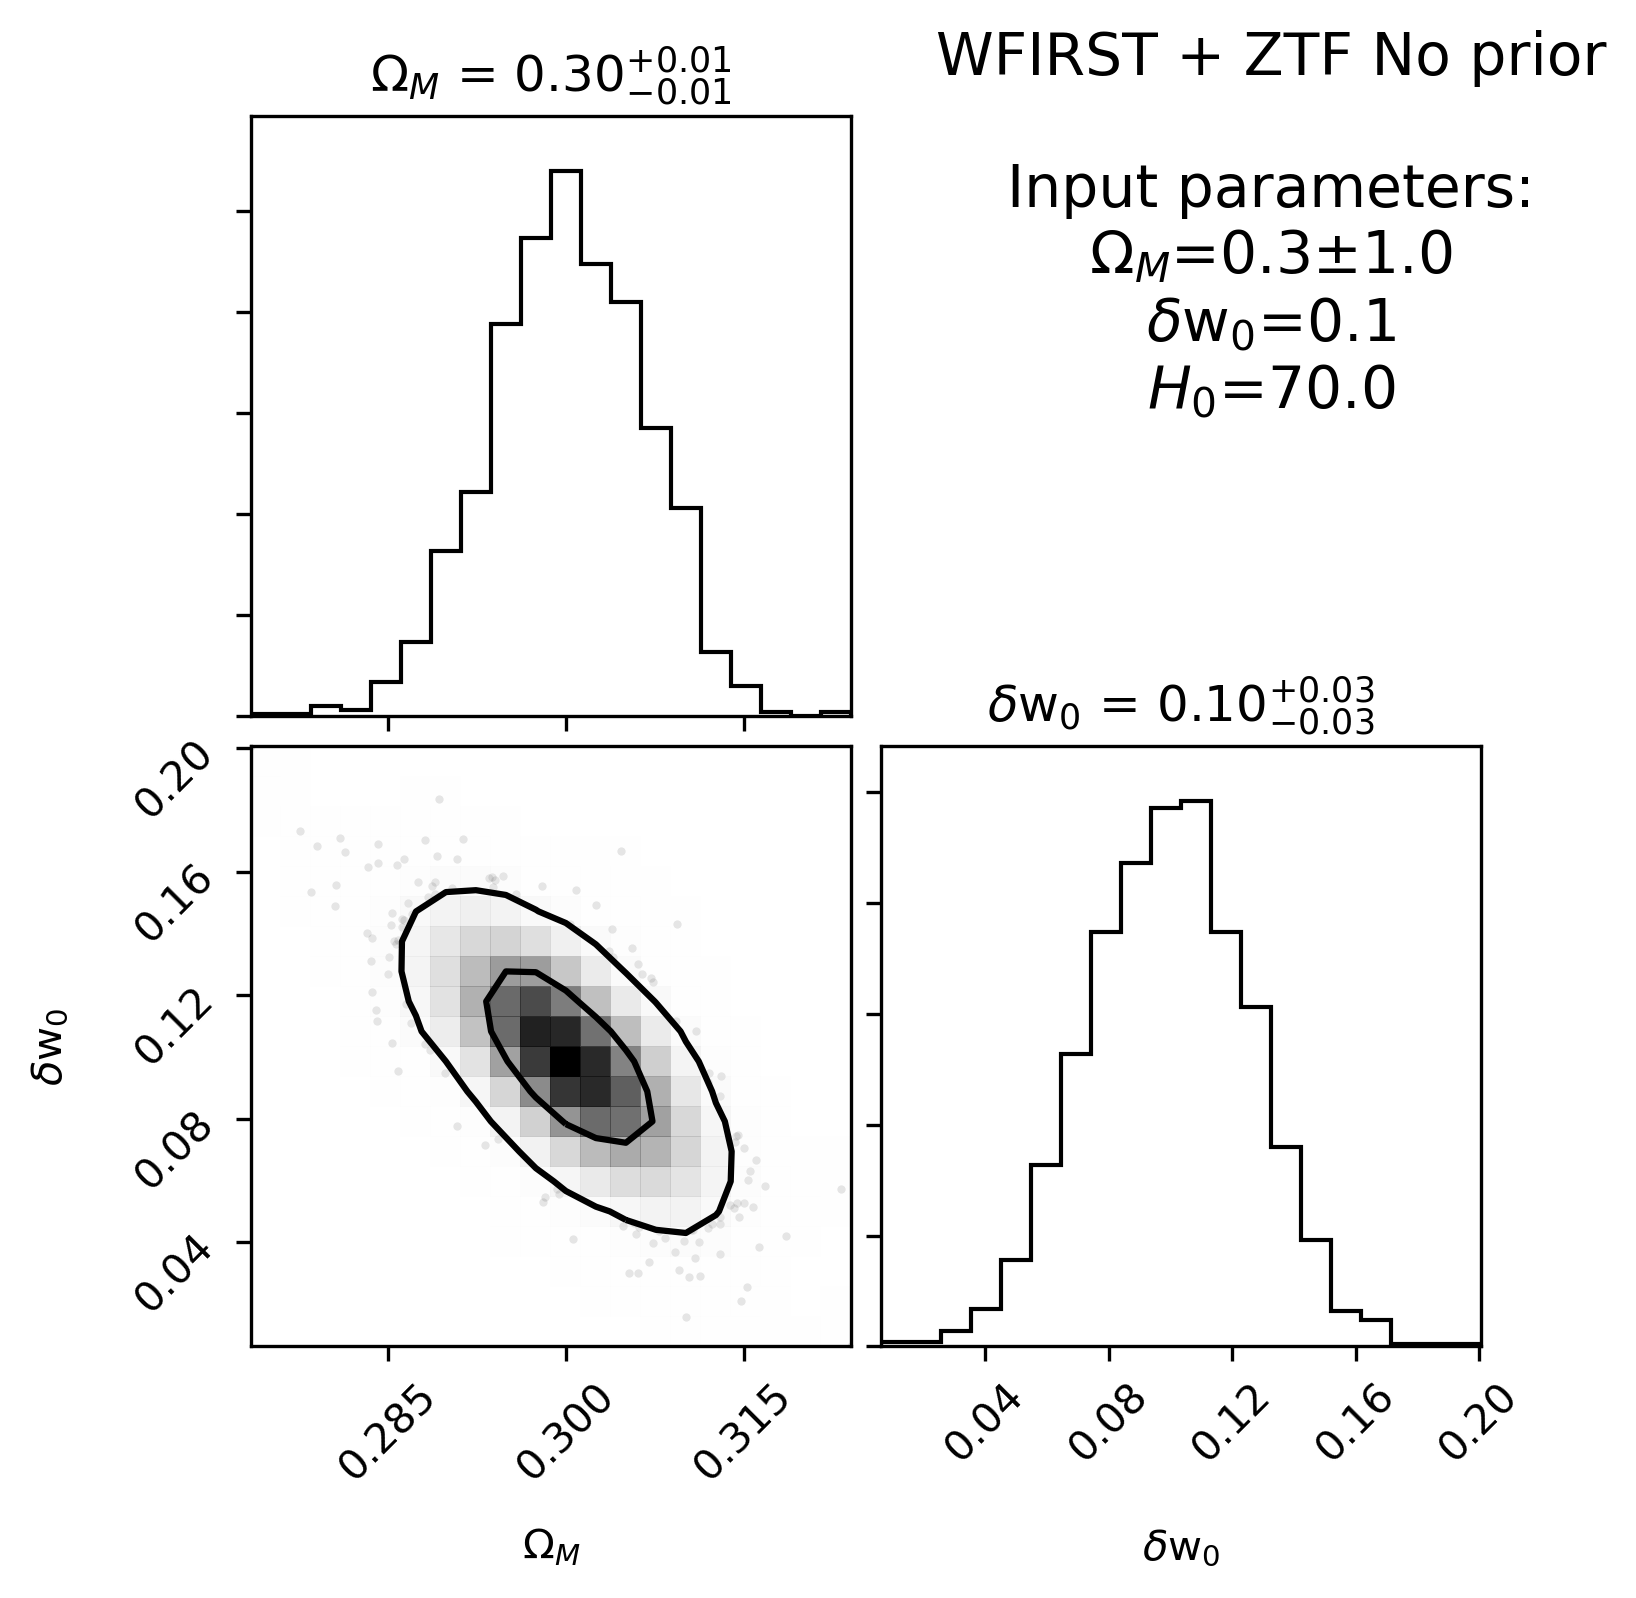

In [130]:
# Fetch data and create contour plots for comparison
data = np.loadtxt(chain_dir+'post_equal_weights.dat')

if parameters == 5:
    figure = corner.corner(data[:,[0,1,2]], smooth=1, levels=(1 - np.exp(-0.5),1 - np.exp(-2.)), 
                       labels=[omegerm, delterw0, w_a , h_0, 'M', 'llhood'], verbose=True,show_titles=True)
else:
    figure = corner.corner(data[:,[0,1]], smooth=1, levels=(1 - np.exp(-0.5),1 - np.exp(-2.)), 
                       labels=[omegerm, delterw0, w_a , h_0, 'M', 'llhood'], verbose=True,show_titles=True)

figure.suptitle( current_model + input_par
#                 # Use next two lines when making a fancy pants plot, manually editing parameters
#                 + omegerm + r'$\mathcal{=0.3}$ '+ pm + r'$\mathcal{.01}$'+'\n'
#                 + delterw0+'=' + r'$\mathcal{0.1}$'+'\nH$_0$=$\mathcal{70.0}$'

                # Use next two lines when making default plots quickly
                + omegerm +'='+ str(Omega_m) + pm + str(Omega_merror) + '\n'
                + delterw0 + '='+ str(d_w0) + '\n'+ h_0 + '=' + str(h0)
                
                ,x=0.8,fontsize=14) 

figure.savefig(plot_save+current_model+'_corner')

# figure = corner.corner(data[:,[0,1,2]], smooth=1.5, levels=(1 - np.exp(-0.5),1 - np.exp(-2.)), 
#                        labels=['om', 'w0', 'wa', 'h0', 'M', 'llhood'], show_titles=True, 
#                       truths=[.3,.1,70.,None,None], color = 'k', truth_color = 'r',bins = 30,
#                        quantiles=[.7,.5,.3], use_math_text=True, plot_contours=False)   

In [19]:
# if comparison_model is None:
#     sys.exit()

In [20]:
# model_fit_name = 'Fit to slowroll'
# current_model = 'JLA without low z + ZTF'
# next_model = 'JLA without low z Only'
# comparison_model = 'JLA Only'
# chain_dir = (chains_directory+current_model+'/')
# chain_dir3 = (chains_directory+next_model+'/')
# data3 = np.loadtxt(chain_dir3 + 'post_equal_weights.dat')

In [25]:
# chain_dir2 = (chains_directory+comparison_model+'/')
data1 = np.loadtxt(chain_dir+'post_equal_weights.dat')
data2 = np.loadtxt(chain_dir2 + 'post_equal_weights.dat')


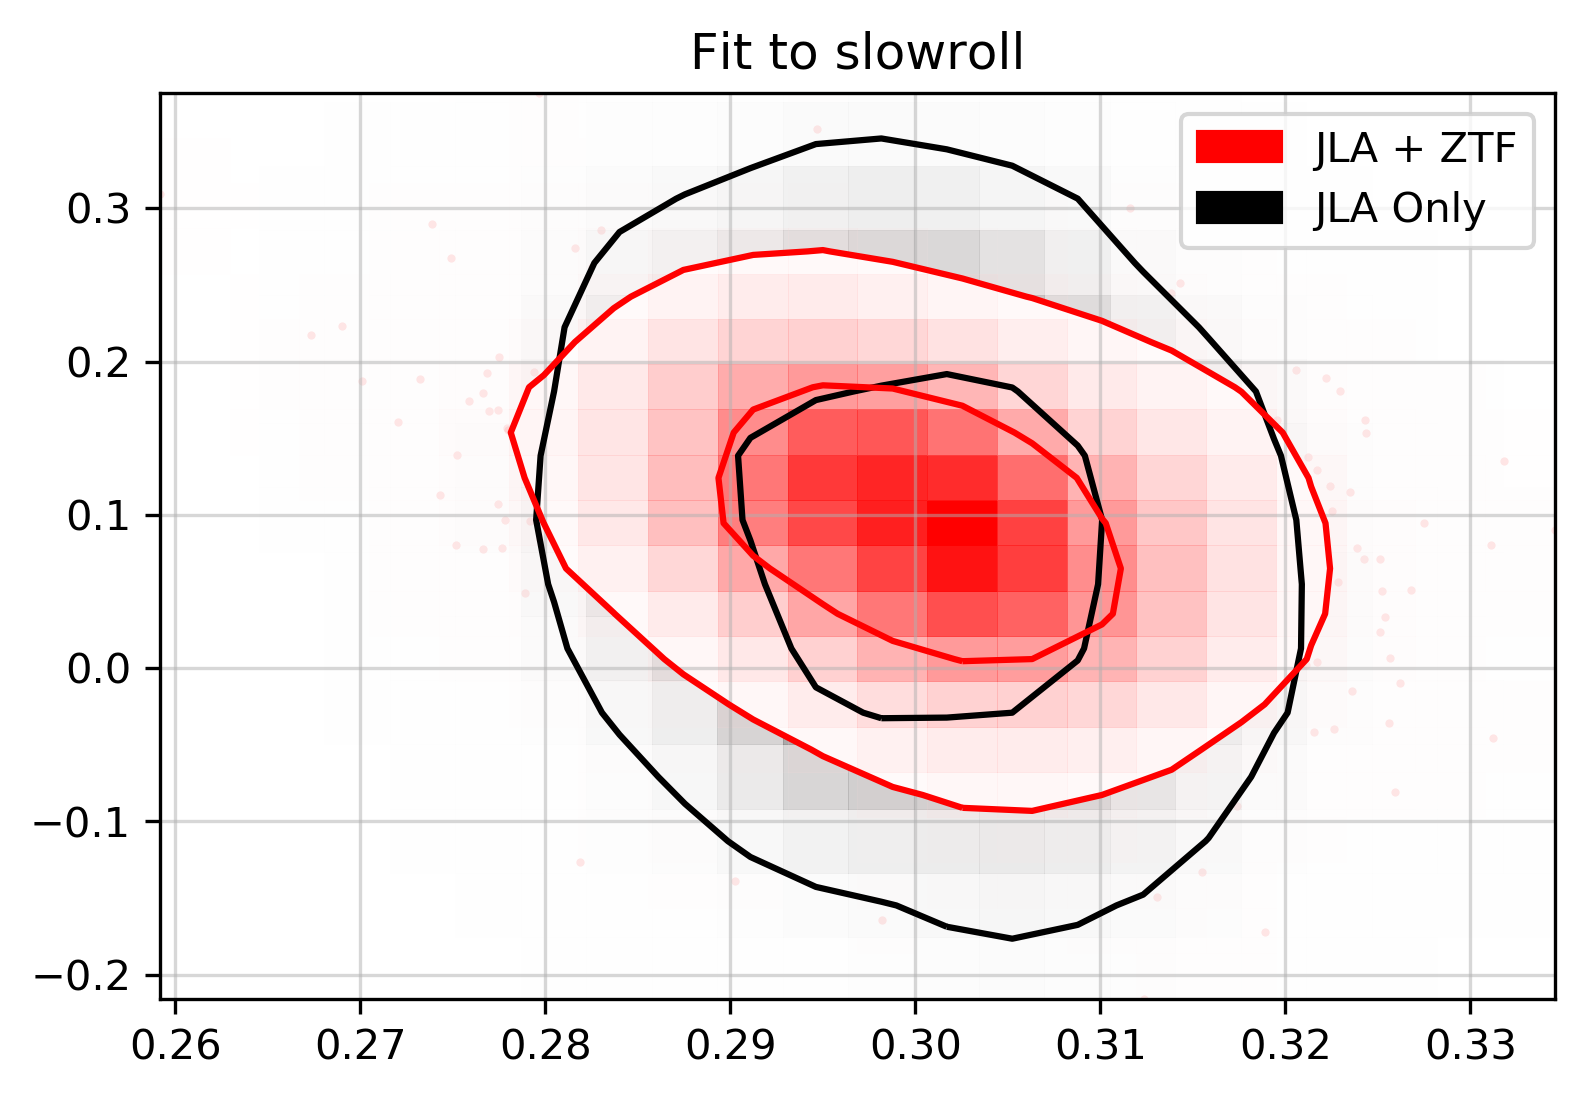

In [26]:
# Overplot 2D contours for different models
# corner.hist2d(data1[:,0],data1[:,1], smooth=1, levels=(1 - np.exp(-0.5),1 - np.exp(-2.)), plot_density=False,
#                         verbose=True, show_titles=True, 
#                           plot_datapoints=False, color = 'r', alpha=.9, label=current_model)

corner.hist2d(data2[:,0],data2[:,1], smooth=1, levels=(1 - np.exp(-0.5),1 - np.exp(-2.)), plot_density=True,
                        verbose=True, show_titles=True, 
                          plot_datapoints=False, color='k', alpha=.6, label=comparison_model)

corner.hist2d(data1[:,0],data1[:,1], smooth=1, levels=(1 - np.exp(-0.5),1 - np.exp(-2.)), 
                       labels=[omegerm, delterw0, w_a , h_0, 'M', 'llhood'], 
                          verbose=True,show_titles=True, color = 'r', alpha=.9, label=current_model)





curr_patch = mpatches.Patch(color='r',label=current_model) 
comp_patch = mpatches.Patch(color='k',label=comparison_model)

plt.grid(True, alpha=.5)
# plt.xlabel(omegerm)
# plt.ylabel(delterw0)
plt.title(model_fit_name)
plt.legend(handles=[curr_patch,comp_patch])
plt.savefig(plot_save+current_model+'_2dhist')


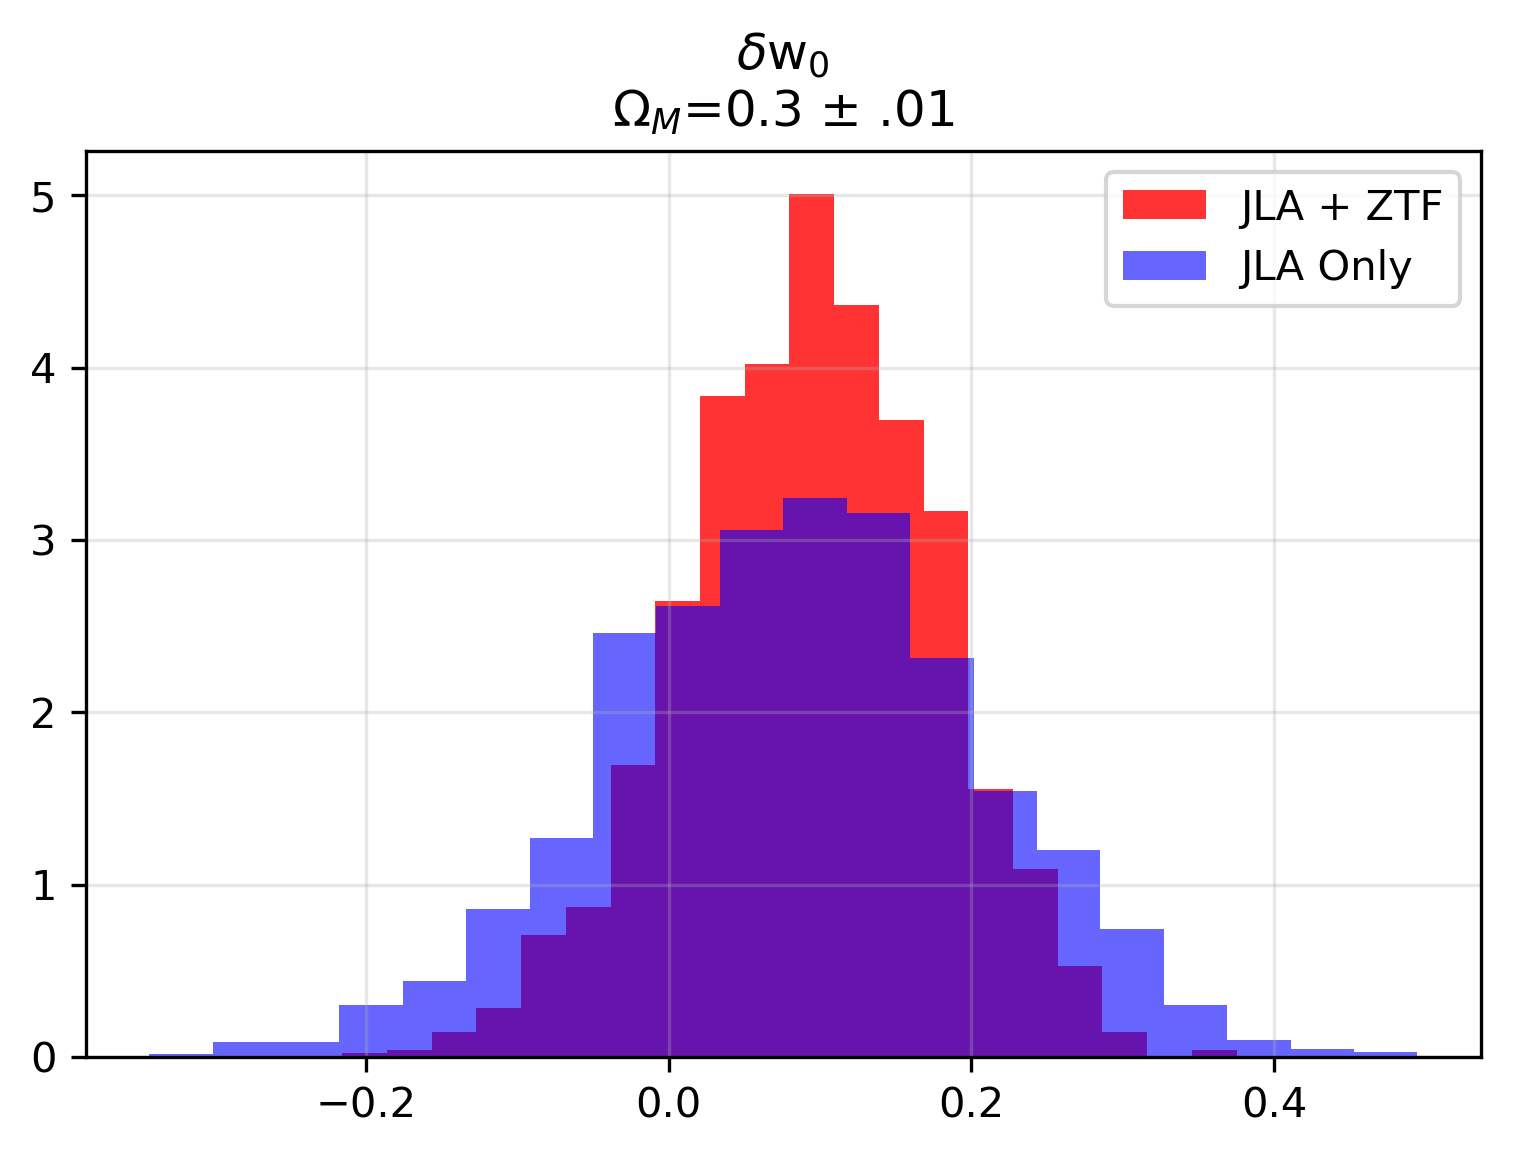

In [30]:
bins=20
plt.hist(data1[:,1],bins,color='r',alpha=.8,label=current_model ,histtype='stepfilled',density=True)
plt.hist(data2[:,1],bins,color='b',alpha=.6,label=comparison_model ,histtype='stepfilled',density=True)

plt.legend()
# plt.xlabel=(r'$\delta$w$_0$')
plt.title(delterw0+'\n'+omegerm+'=0.3 $\pm$ .01')
plt.grid(True, alpha=.3)
plt.savefig(plot_save+current_model+'_1D_Hist')

In [158]:
# !cat '/Users/markpoe/ZTF/lowzSN/notebooks/chains/model_fitting_trial_run4/stats.dat'
filename=(chain_dir+'stats.dat')
temp=[]
tempp=[]
with open(filename,'r') as f:
    for line in f:
#         print (line)
        temp.append(line)
print ('Parameter 2 Mean and sigma','\n',temp[5],'Parameter 1 Mean and sigma','\n',temp[4])

Parameter 2 Mean and sigma 
    2    0.388086725210074410E-01    0.202867346603980508E+00
 Parameter 1 Mean and sigma 
    1    0.310395102073888485E+00    0.733300673491717458E-01



In [159]:
### Access log evidence and calculate delta log evidence for two models

# Define variables for use in a loop
stat = '/stats.dat'
Model_1 = chains_directory + current_model +  stat
Model_2 = chains_directory + comparison_model +  stat

# Build array of log evs for two models
ev = []
models = [Model_1,Model_2]
for x in models:
    with open(x, "r") as f:
        for line in f:
            if "Nested Sampling Global Log-Evidence" in line:
                ev.append(line)
    f.close()
print (ev)

# Extract the evidences from the above array and convert to float
z = []
for x in ev:
    y = x.split(':')
    t = y[1].split('+/-')
    z.append(t[0])
ev1,ev2 = float(z[0]), float(z[1])
# print ('\n','Log evs as floats','\n',ev1,ev2)

# Calculate and print delta of the log evidences
delta_lnE = np.abs(ev1 - ev2)
print ('\n','Delta Log Evidence of the two models','\n',delta_lnE)

['Nested Sampling Global Log-Evidence           :   -0.859649071669218223E+01  +/-    0.134149067478033124E+00\n', 'Nested Sampling Global Log-Evidence           :   -0.697700007162334046E+01  +/-    0.118512904492173138E+00\n']

 Delta Log Evidence of the two models 
 1.6194906450688418


In [112]:
# Print evidences and the abs value of delta evidences
e1 = np.exp(ev1)
e2 = np.exp(ev2)
print (e1, 'Evidence for current model')
print (e2, 'Evidence for comparison model')
delta_evidence = np.abs(e1 - e2)
print ('\n','Delta evidence','\n', delta_evidence)

# Print Bayes factor ev1/ev2
# Bayes_factor = np.divide(np.exp(ev1),np.exp(ev2))
Bayes_factor = np.divide(np.exp(ev2),np.exp(ev1))

# Print log of the Bayes Factor, should be same as delta log evs
log_bayes_factor = np.abs(np.log(Bayes_factor))
print ('\n','Log Bayes Factor (Delta Log evs)','\n',log_bayes_factor)

# If the log bayes is negative, can use this to find bayes factor
# Bayes_factor = np.exp(np.abs(log_bayes_factor))
print ('\n','Bayes Factor','\n',Bayes_factor)

# Not sure if we need to use absolute values on the Bayes factors here
# Double check with someone who knows about this

6.42863471747227e-24 Evidence for current model
2.857297094730488e-06 Evidence for comparison model

 Delta evidence 
 2.857297094730488e-06

 Log Bayes Factor (Delta Log evs) 
 40.63564559448346

 Bayes Factor 
 4.444640612360027e+17


In [113]:
# ### Define here:
# current_model = 'model_fitting_trial_run3'
# comparison_model = 'model_fitting_trial_run2' 
# data_path = '../jla_data/'
# bin_file = 'dist_binned.txt'
# cov_mat_file = 'covmat_binned.txt'
# # cosm_def = w0waCDM(H0=70., Om0=0.3, Ode0=.7, w0=-.9, wa=-.1)
# cosm_def = Cosmology('slowroll',[0.3,0.1,70.])